# PC2 - Exploratory Data Analysis

cours [MAP 535](https://moodle.polytechnique.fr/course/view.php?id=14763): Regression de Karim Lounici

auteur de ce notebook python : Marc Lelarge

## Setup

to create a virtual environment see: https://dataflowr.github.io/website/modules/0-sotfware-installation/

The packages required for this practical arge given below:

Dataset can be downloaded on the [Moodle](https://moodle.polytechnique.fr/mod/folder/view.php?id=290499)

## 1. The bea database

The data file bea-2006.csv contains information about the economies of the 366 metropolitan statistical areas (cities) of the US in 2006. In particular, it lists, for each city, the population, the total value of all goods and services produced for sale in the city that year per person (per capita gross metropolitan product, pcgmp), and the share of economic output coming from four selected industries.

###  1.1 Load the data file and verify that it has 366 rows and 7 columns. Why should it have seven columns, when the paragraph above described only six variables?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./bea-2006.csv')

In [3]:
df.head()

,MSA,pcgmp,pop,finance,prof.tech,ict,management
0,"Abilene, TX",24490,158700.0,0.09750,NaN,0.01621,NaN
1,"Akron, OH",32890,699300.0,0.12940,0.05440,NaN,0.054310
2,"Albany, GA",24270,163000.0,0.08217,NaN,0.00708,NaN
3,"Albany-Schenectady-Troy, NY",36840,850300.0,0.15780,0.09399,0.04511,NaN
4,"Albuquerque, NM",37660,816000.0,0.15990,0.09978,0.20500,0.006509


**Answer** : The data file has a column for the name of the city and one column for each of the six economic factors taken into account in this study. See the description above for more details

### 1.2  Calculate summary statistics for the six numerical-valued columns.

In [4]:
df.describe()

,pcgmp,pop,finance,prof.tech,ict,management
count,366.000000,3.660000e+02,354.000000,254.000000,290.000000,209.000000
mean,32922.759563,6.808977e+05,0.150825,0.049051,0.039100,0.009083
std,9219.907216,1.554965e+06,0.061775,0.028238,0.058392,0.008797
min,14920.000000,5.498000e+04,0.038450,0.014740,0.003490,0.000416
25%,26532.500000,1.356250e+05,0.104025,0.029320,0.012150,0.002941
50%,31615.000000,2.315000e+05,0.141400,0.042125,0.022175,0.006509
75%,38212.500000,5.308750e+05,0.181225,0.059323,0.040722,0.011910
max,77860.000000,1.885000e+07,0.384800,0.190800,0.586000,0.054310


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MSA         366 non-null    object 
 1   pcgmp       366 non-null    int64  
 2   pop         366 non-null    float64
 3   finance     354 non-null    float64
 4   prof.tech   254 non-null    float64
 5   ict         290 non-null    float64
 6   management  209 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


## 2  Exploratory Data Analysis (EDA) plots (hist, boxplot, etc.)

### 2.1  Make univariate EDA plots for population and for per-capita GMP, and describe their distributions in words. 

Use the commands histplot and boxplot of [seaborn](https://seaborn.pydata.org/)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(palette='colorblind')

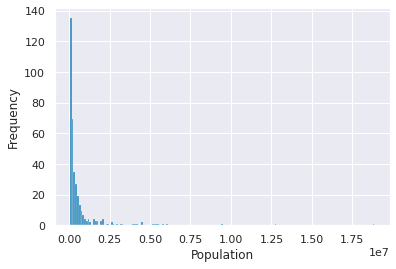

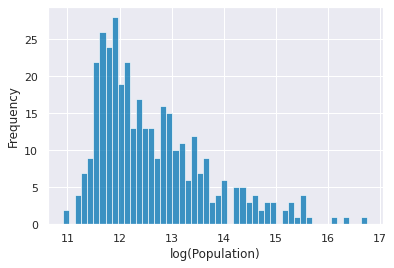

In [7]:
fig1 = sns.histplot(df['pop'])
plt.ylabel('Frequency')
plt.xlabel('Population')
plt.show()
fig2 = sns.histplot(np.log(df['pop']),bins=50)
plt.ylabel('Frequency')
plt.xlabel('log(Population)')
plt.show()

**Answer :** the distribution of city (metro area) populations has a highly positive [skewness](https://en.wikipedia.org/wiki/Skewness), with the New York-Northern New Jersey-Long Island area having the highest documented population. Plotting the distribution on the log scale (lower panel) allows for a more informative inspection.

In [8]:
df[df['pcgmp']==df['pcgmp'].max()]

,MSA,pcgmp,pop,finance,prof.tech,ict,management
46,"Bridgeport-Stamford-Norwalk, CT",77860,890500.0,0.3791,0.08485,NaN,0.04285


<AxesSubplot:xlabel='pcgmp', ylabel='Count'>

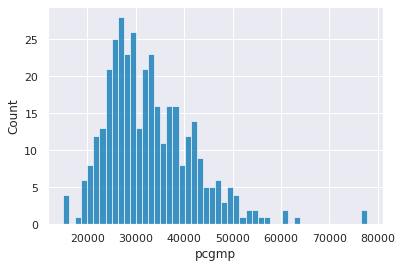

In [9]:
sns.histplot(df['pcgmp'],bins=50)

<AxesSubplot:xlabel='pcgmp'>

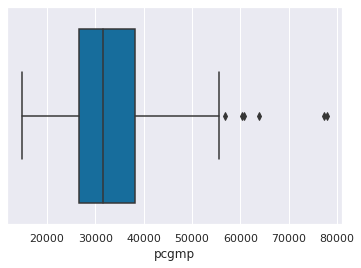

In [10]:
sns.boxplot(x=df['pcgmp'])

**Answer:** Similar to population, the distribution of per-capita GMP has a positive skewness. The mean per-capita GMP over all 366 cities is approximately  33,000  per person-year, while Bridgeport-Stamford-Norwalk, CT boasts a per-capita GMP of  78,000  per person-year, approximately 5 standard deviations above the mean.

### 2.2  Make a bivariate EDA plot for per-capita GMP as a function of population. Describe the relationship in words.

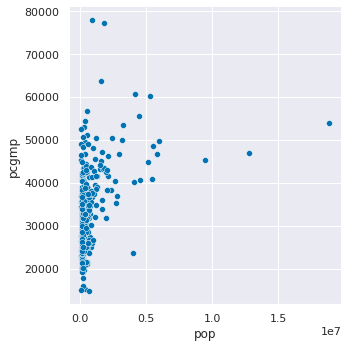

In [11]:
fig = sns.relplot(x='pop',y='pcgmp',data=df)

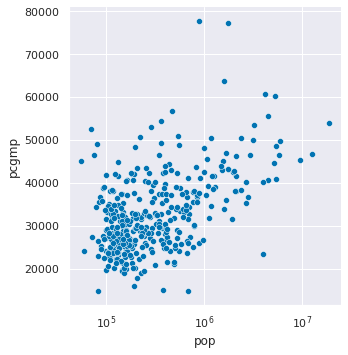

In [12]:
fig = sns.relplot(x='pop',y='pcgmp',data=df)
fig.set(xscale="log")

**Answer :** Per-capita GMP and population have a positive association. This trend is most apparent on the log scale.

## 3  Ordinary least squares regression

### 3.1  Using only the functions mean, var, cov, sum and arithmetic, calculate the slope and intercept of the least-squares regression line.

In [13]:
beta_1 = np.cov(df['pop'],df['pcgmp'])[0,1]/np.var(df['pop'])

beta_0 = np.mean(df.pcgmp) - beta_1 * np.mean(df['pop'])

In [14]:
print(" beta_0 is : {0} and beta_1 is : {1} ".format(beta_0,beta_1))

 beta_0 is : 31273.066321424303 and beta_1 is : 0.002422820877944545 


### 3.2  What are the slope and intercept returned by the function OLS? Does it agree with your answer in the previous part? Should it?

In python we'll use [statsmodels](https://www.statsmodels.org/stable/index.html), and the [OLS method](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html)

In [15]:
import statsmodels.api as sm

In [16]:
X = df['pop']
X = sm.add_constant(X)
y = df['pcgmp']

In [17]:
mod = sm.OLS(y,X)
res = mod.fit()

In [18]:
res.params

const    31277.573680
pop          0.002416
dtype: float64

In [19]:
from patsy import dmatrices,dmatrix
y,X = dmatrices('pcgmp ~ pop',data=df,return_type='dataframe')

In [20]:
mod = sm.OLS(y,X)
res = mod.fit()

In [21]:
res.params

Intercept    31277.573680
pop              0.002416
dtype: float64

**Answer :** The values of  $β_0$  and  $β_1$  provided by the lm method and our direct computation are the same as expected.

**Practical Note:** If you don’t want to fit an intercept term in your model, but only the slope (because you are assuming that the intercept is 0), you can add +0 or -1 to the right hand side of the formula in the dmatrices function. For instance dmatrices('y ~ x + 0', data = df) for some data frame df with columns y and x.

### 3.3  Add both lines to the bivariate EDA plot. (Add only one line, of course, if you think they are the same.) Comment on the fit. Do the assumptions of the simple linear regression model appear to hold? Are they any places where the fit seems better than others?

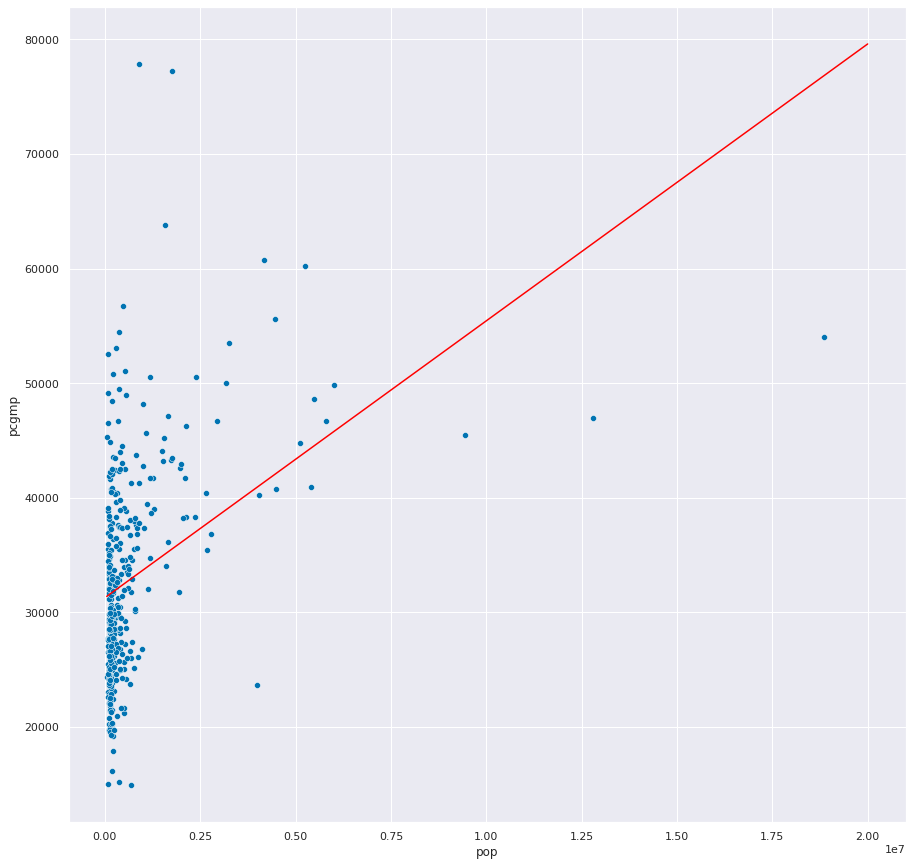

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(x=(df['pop']),y=df['pcgmp'],ax=ax)

xvals = np.linspace(5e4,2e7,400)
abline_values = [res.params[1] * point + res.params[0] for point in xvals]
plt.plot(xvals,abline_values,label='manual',color='red',)
plt.show()

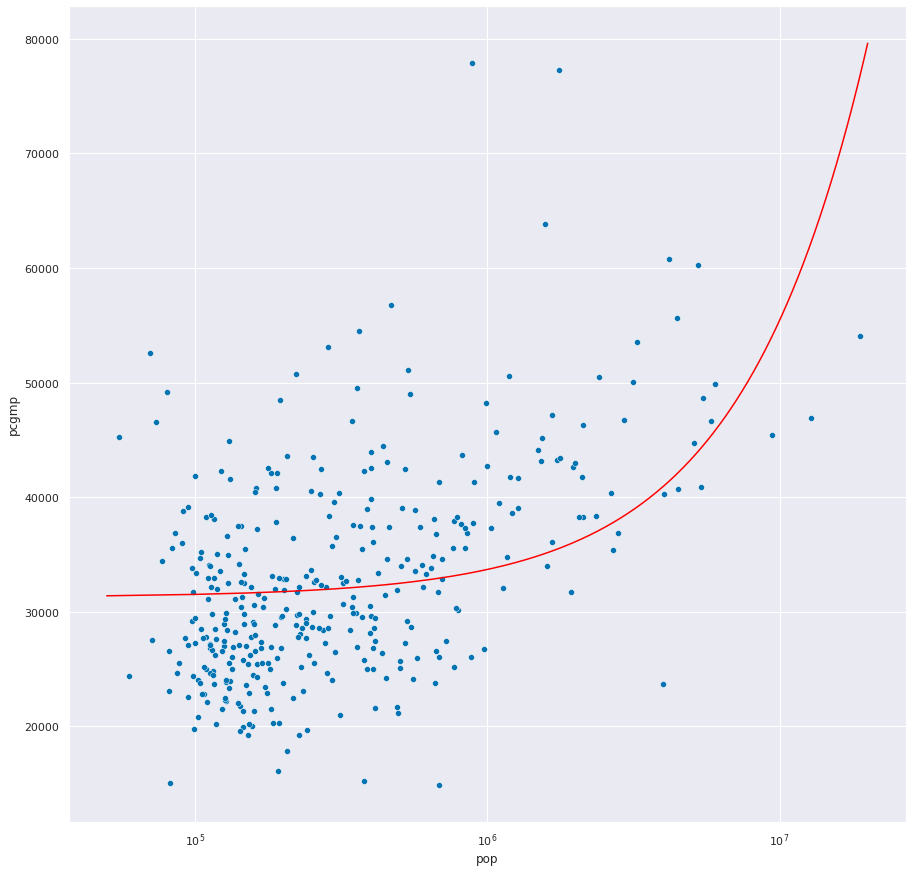

In [23]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(x=(df['pop']),y=df['pcgmp'],ax=ax)
plt.xscale('log')

xvals = np.linspace(5e4,2e7,400)
abline_values = [res.params[1] * (point) + res.params[0] for point in xvals]
plt.plot(xvals,abline_values,label='manual',color='red',)
plt.show()

**Answer :** This figure shows per-capita GMP vs. Population with the least squares regression line plotted in red. Here we have plotted the x-axis on the log-scale so we can better examine the regression fit, but it is important to note that the regression is still on Population, not log(Population). The assumptions of the simple linear regression do not hold here. In particular, the linear model significantly understimates the the per-capita GMP for cities with relatively large populations. The fit is somewhat better for small populations.

### 3.4 Find Pittsburgh in the data set. What is the population? The per-capita GMP? Theper-capita GMP predicted by the model? The residual for Pittsburgh?

In [24]:
df[df['MSA']=="Pittsburgh, PA"]

,MSA,pcgmp,pop,finance,prof.tech,ict,management
261,"Pittsburgh, PA",38350,2361000.0,0.2018,0.0777,0.03434,0.02946


In [25]:
df.loc[261]

MSA           Pittsburgh, PA
pcgmp                  38350
pop                2.361e+06
finance               0.2018
prof.tech             0.0777
ict                  0.03434
management           0.02946
Name: 261, dtype: object

In [26]:
res.fittedvalues[261]

36982.22459225301

In [27]:
res.resid[261]

1367.7754077469872

**Answer :** The simple linear model predicts a per-capita GMP of almost  37,000  per person-year for Pittsburgh, yielding a residual of approximately  1,370  per person-year.

### 3.5  What is the mean squared error of the regression? 

That is, what is $n^{−1}∑_{i=1}^n e^2_i$ where $e_i=Y_i−Ŷ_i$ is the residual.

In [28]:
MSE = np.mean(res.resid**2)
print(' the mean squared error is : ', MSE)

 the mean squared error is :  70697144.92297572


In [29]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  pcgmp   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     72.48
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           4.49e-16
Time:                        14:07:44   Log-Likelihood:                -3826.9
No. Observations:                 366   AIC:                             7658.
Df Residuals:                     364   BIC:                             7666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.128e+04    481.213     64.997      0.0

### 3.6  Is the residual for Pittsburgh large, small, or typical compared to the mean squared error (MSE)?

In [30]:
MSE_Pittsburgh = res.resid[261]**2
print('The squared residual for Pittsburgh  is : ', MSE_Pittsburgh)

The squared residual for Pittsburgh  is :  1870809.566037437


**Answer:** Pittsburgh’s squared residual is relatively small when compared to the MSE.

### 3.7  Make a plot of residuals (vertical axis) against population (horizontal axis). What should this look like if the assumptions of the simple linear regression model hold? Is the actual plot compatible with those assumptions? Explain.

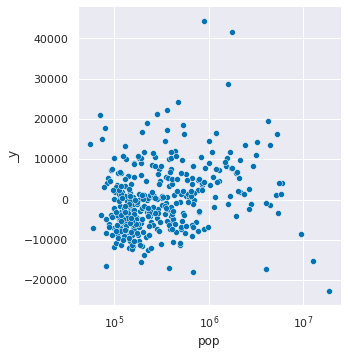

In [31]:
fig = sns.relplot(x=df['pop'],y=res.resid)
fig.set(xscale="log")
plt.show()

**Answer:** If the assumptions of the linear regression held, the residuals would have a symmetric and homoscedastic scatter around 0. The above figure is not compatible with the standard linear regression assumptions. In particular, most of the residuals are negative at low populations and most of the residuals are positive at populations above approximately 1,000,000. Furthermore, there are several highly positive outliers which are not well-explained by the homoscedastic linear model.

### 3.8  Make a plot of squared residuals (vertical axis) against population (horizontal axis). What should this look like if the assumptions of the simple linear regression model hold? Is the actual plot compatible with those assumptions? Explain.

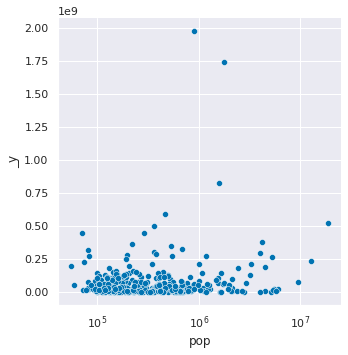

In [32]:
fig = sns.relplot(x=df['pop'],y=res.resid**2)
fig.set(xscale="log")

**Answer:** If the homoscedastic assumption of the linear model held (i.e., $Var(ϵ_i)=σ^2$ ), then the squared residuals would have an approximately constant amplitude over all values of population. This assumption is violated by two or three residuals (Bridgeport-Stamford-Norwalk, CT and San Jose-Sunnyvale-Santa Clara, CA being the worst), but it looks rather reasonable for the other observations.

### 3.9  State, carefully, the interpretation of the estimated slope; be sure to refer to the actual variables of the problem, not abstract ones like ‘the predictor variable’ or X.

**Answer:** Based on this data set, the total value of all goods and services produced for sale in a city in 2006 (per person) has a highly significant positive correlation with the population of the city. On average, a one person increase in population is associated with a 0.002416201 per person-year increase in per-capita GMP.

## 4  Predictions using OLS estimates¶

### 4.1  What per-capita GMP does the model predict for a city with  $10^5$  more people than Pittsburgh?

In [33]:
new_case =dmatrix('pop',data=df.loc[261],return_type='dataframe')
new_case['pop'] += 1e5

In [34]:
res.predict(new_case)

0    37223.844707
dtype: float64

**Answer :** The model predicts a per-capita GMP of approximately $37,200 per person-year for a city with 100,000 more people than Pittsburgh, PA.

### 4.2  What does the model predict would happen to Pittsburgh’s per-capita GMP if, by a policy intervention, we added  $10^5$  people to the population ? (it means if we artificially add  $10^5$  people to each city)

In [35]:
res.params[1] * 1e5

241.62011487698373

**Answer:** If, by a policy intervention, we added 100,000 people to Pittsburgh’s population, the model predicts that the per-capita GMP would increase by approximately 240 $ per person-year.